### Explorative Data Analysis - 60Min
---  
## ``Untersuchen der Haupteinflüsse auf den Autopreis``


---
# **``Daten Import``**


## ``Einlesen und prüfen der Datenstruktur``

**Verwende für die Übung folgende Daten:**
* Dataset: *[data/automobileEDA.csv](data/automobileEDA.csv)*
<br>*Beachte evtl vorhandene Metadaten*<br>

Lies die angegebenden Datasets ein und kontrolliere den Aufbau der eingelesenen Daten.


In [1]:
import warnings
#warnings.simplefilter("ignore", category=FutureWarning)
# ---> Dein Code

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#-----------------------------------------------------------------

# df = pd.read_csv("data/automobileEDA.csv", delimiter=",")
df = pd.read_csv("data/mood_detection_data_realistic.csv", delimiter=",")

---
# **``Explorative Analyse der Daten``**



<div style="background-color:rgba(250, 250, 0, 0.1)">

---
## **``Practice``: Korrelationsmatrix** 
---

Erstelle eine **Korrelationsmatrix** und eine **Heatmap** für die Attribute
- ``bore``,
- ``stroke``,
- ``compression-ratio``,
- ``city-L/100km``,
- ``city-mpg`` und
- ``horsepower``



---

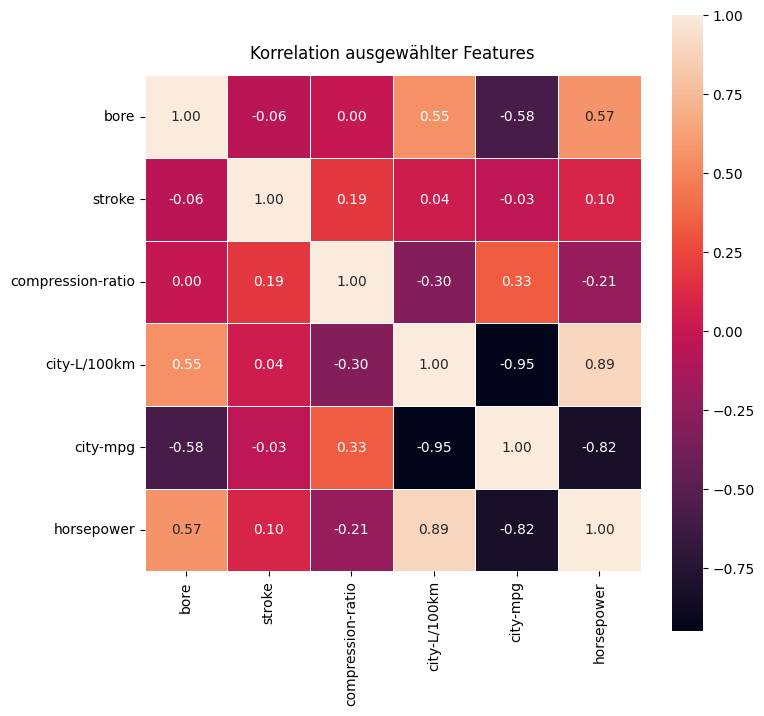

In [5]:
# ---> Dein Code
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,8))  

# Auswahl der Features
selectCols = ['bore', 'stroke', 'compression-ratio', 'city-L/100km', 'city-mpg', 'horsepower']
corr = df[selectCols].corr()

sns.heatmap(corr,square=True, linewidths=.5, annot=True, fmt = '.2f', ax=ax)
ax.set_title("Korrelation ausgewählter Features",fontdict={'fontsize':12}, pad=12)

plt.show()


<div style="background-color:rgba(250, 0, 0, 0.1)">

---
**Interpretation des Diagramms!**<br>  
 
Der Datensatz enthält verschiedene Merkmale im Zusammenhang mit den Fahrzeugspezifikationen, die helfen, die Beziehung zwischen verschiedenen Aspekten der Fahrzeuge zu verstehen, wie z. B. Motoreigenschaften und Kraftstoffeffizienz. Anhand der Korrelationsmatrix kann die Beziehungen zwischen den ausgewählten Merkmalen interpretiert werden:

 - **Bore**: Dies misst den Durchmesser der Zylinder im Motor. Es besteht eine positive Korrelation mit city-L/100km (Kraftstoffverbrauch) und horsepower, was darauf hindeutet, dass größere Zylinderdurchmesser mit einem höheren Kraftstoffverbrauch und einer höheren Leistung einhergehen könnten.
 - **Stroke**: Dies misst die Strecke, die der Kolben im Zylinder zurücklegt. Es hat geringe Korrelationen mit anderen Merkmalen und zeigt nur eine geringe Beziehung, außer einer leichten positiven Korrelation mit dem compression-ratio.
 - **Compression Ratio**: Dies ist das Verhältnis von maximalem zu minimalem Volumen im Zylinder. Es hat eine moderate negative Korrelation mit city-L/100km, was darauf hinweist, dass ein höheres Verdichtungsverhältnis mit einer besseren Kraftstoffeffizienz (niedrigerer city-L/100km) verbunden sein könnte.
 - **City-L/100km**: Dies ist ein Maß für den Kraftstoffverbrauch (Liter pro 100 km in der Stadt). Es hat eine hohe negative Korrelation mit city-mpg (Meilen pro Gallone in der Stadt) und eine positive Korrelation mit horsepower, was darauf hindeutet, dass eine höhere Motorleistung tendenziell den Kraftstoffverbrauch erhöht.
 - **City-mpg**: Dies ist die Stadtreichweite in Meilen pro Gallone und steht in umgekehrter Beziehung zu city-L/100km. Die negative Korrelation mit horsepower zeigt, dass Autos mit höherer Leistung in der Regel eine geringere Kraftstoffeffizienz in der Stadt aufweisen.
 - **Horsepower**: Dies repräsentiert die Motorleistung. Es hat starke positive Korrelationen mit bore und city-L/100km, was darauf hinweist, dass Motoren mit höherer Leistung auch tendenziell größere Bohrungen aufweisen und mehr Kraftstoff verbrauchen.

Diese Interpretationen zeigen, wie Merkmale wie Bore, Compression Ratio und Horsepower mit dem Kraftstoffverbrauch und der Effizienz zusammenhängen und geben Einblicke in Design- und Leistungsabstimmungen von Motoren.

---
</div>

<div style="background-color:rgba(250, 250, 0, 0.1)">

---
## **``Practice:`` Korrelation - Prädiktion**
---

Untersuche den Zusammenhang **``aller Attribute``** des Datasets mit dem **``Preis``**.

Erstelle dabei für jedes Attribut:
- einen **``Scatterplot``** mit der Regressionsgeraden oder einen **``Boxplot``**, 
- den **``Korelationskoeffizient``** und
- eine **``Interpretation``** des Diagramms.
<br><br>   
     
Gib weiters für jedes Attribut an, ob es als ``Prädiktor für den Preis`` verwendet werden kann.

---

### Feature: **normalized-losses**

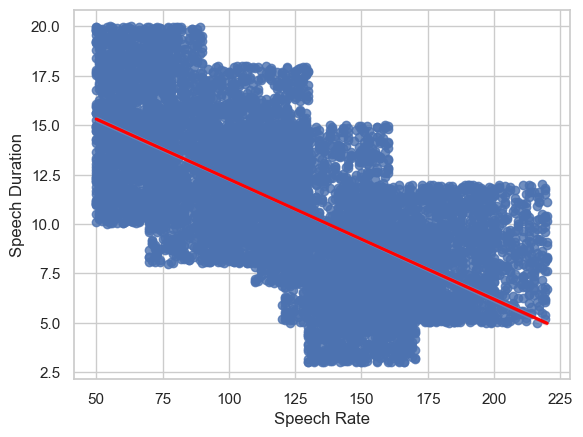

,Speech Rate,Speech Duration
Speech Rate,1.00000,-0.65609
Speech Duration,-0.65609,1.00000


In [22]:
# Visualisiere den Zusammenhang
# ---> Dein Code
import seaborn as sns

sns.regplot(x="Speech Rate", y="Speech Duration", data=df, line_kws={"color": "red"})
plt.show()

# Ermittle den Korrelationskoeffizient
# ---> Dein Code
df[['Speech Rate','Speech Duration']].corr()

<div style="background-color:rgba(250, 0, 0, 0.1)">

---
**Interpretation des Ergebnisses!**<br>  
 
Mit zunehmendem Wert von *``normalized-losses``* steigt tendenziell auch der Preis: Dies deutet auf eine *``positive direkte Korrelatio``*n zwischen diesen beiden Variablen hin, auch wenn sie relativ schwach ist. *``Da die Werte nicht stark um die Regressionslinie gruppiert sind und eine gewisse Streuung zeigen, ist der Zusammenhang eher moderat.``*

Die Regressionslinie zeigt eine leichte Steigung, was bedeutet, dass *``normalized-losses``* einen gewissen, aber nicht starken Einfluss auf den Preis hat. *``Da die Linie nicht sehr steil ist, ist sie nur bedingt als Prädiktor für den Preis geeignet.``*

*``Normalized-losses``* scheint somit ein *``mäßiger Prädiktor für den Preis``* zu sein, was auf weitere Faktoren hinweist, die den Preis stärker beeinflussen könnten

---
</div>

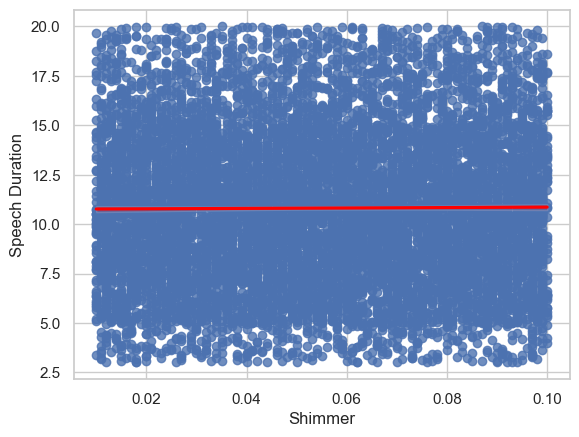

,Shimmer,Speech Duration
Shimmer,1.000000,0.007164
Speech Duration,0.007164,1.000000


In [16]:
# Visualisiere den Zusammenhang
# ---> Dein Code
import seaborn as sns

sns.regplot(x="Shimmer", y="Speech Duration", data=df, line_kws={"color": "red"})
plt.show()

# Ermittle den Korrelationskoeffizient
# ---> Dein Code
df[['Shimmer','Speech Duration']].corr()

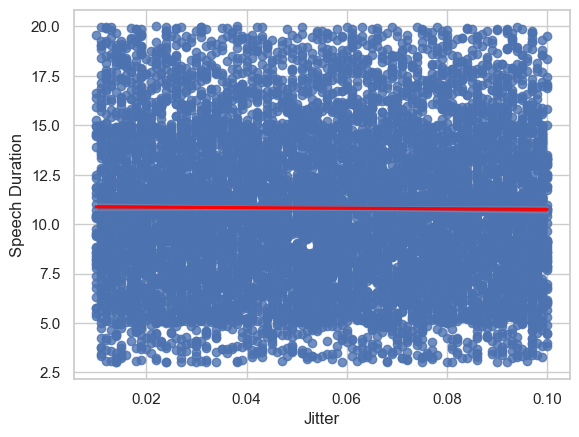

,Jitter,Speech Duration
Jitter,1.000000,-0.009993
Speech Duration,-0.009993,1.000000


In [17]:
# Visualisiere den Zusammenhang
# ---> Dein Code
import seaborn as sns

sns.regplot(x="Jitter", y="Speech Duration", data=df, line_kws={"color": "red"})
plt.show()

# Ermittle den Korrelationskoeffizient
# ---> Dein Code
df[['Jitter','Speech Duration']].corr()

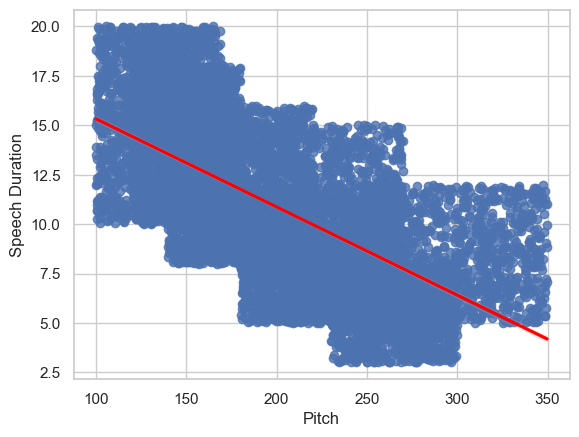

,Pitch,Speech Duration
Pitch,1.000000,-0.660479
Speech Duration,-0.660479,1.000000


In [18]:
# Visualisiere den Zusammenhang
# ---> Dein Code
import seaborn as sns

sns.regplot(x="Pitch", y="Speech Duration", data=df, line_kws={"color": "red"})
plt.show()

# Ermittle den Korrelationskoeffizient
# ---> Dein Code
df[['Pitch','Speech Duration']].corr()

### Feature: **body-style**

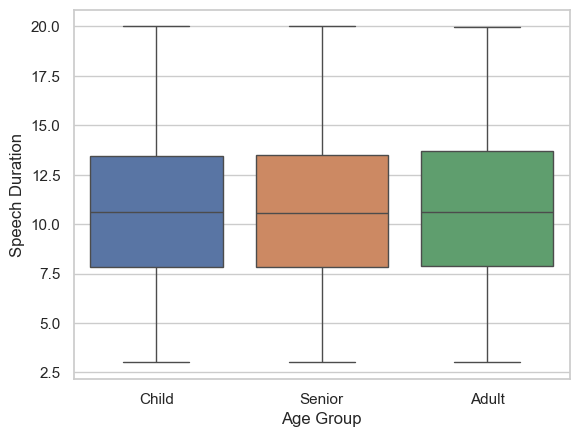

In [9]:
import seaborn as sns

sns.set_theme() # Defaulteinstellungen
sns.set_style("whitegrid")

sns.boxplot(x="Age Group", y="Speech Duration", hue="Age Group", data=df)
plt.show()

<div style="background-color:rgba(250, 0, 0, 0.1)">

---
**Interpretation des Ergebnisses!**<br>  
 
Wir sehen, dass sich die Preisverteilungen zwischen den verschiedenen Karosseriekategorien erheblich überschneiden, so dass die Karosserieform kein guter Prädiktor für den Preis ist.

---
</div>

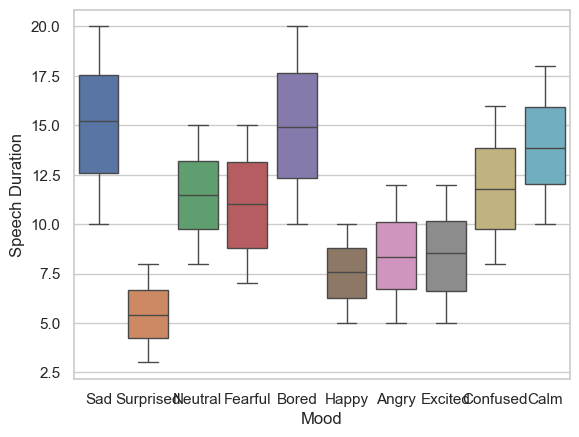

In [20]:
import seaborn as sns

sns.set_theme() # Defaulteinstellungen
sns.set_style("whitegrid")

sns.boxplot(x="Mood", y="Speech Duration", hue="Mood", data=df)
plt.show()

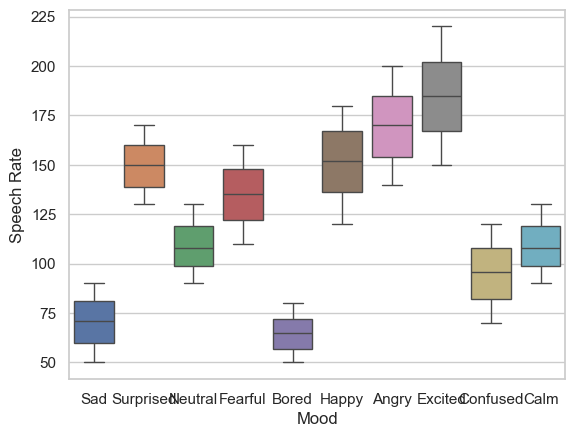

In [21]:
import seaborn as sns

sns.set_theme() # Defaulteinstellungen
sns.set_style("whitegrid")

sns.boxplot(x="Mood", y="Speech Rate", hue="Mood", data=df)
plt.show()

### Feature: **make**

---> Deine weiteren Schritte